# What type of Machine learning problem is this?

This is a supervised machine learning problem

# Problem Statement

Analyze the dataset and predict whether the income of an adult will exceed 50k per year or not by developing a supervised machine learning model.

In [1]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm

In [2]:
#load the dataset
income=pd.read_csv('adult.csv')
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
income.shape

(48842, 15)

In [5]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
#replacing some special character columns names with proper names 
income.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'duration','marital-status': 'marital','income': 'revenue'}, inplace=True)
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'duration', 'country', 'revenue'],
      dtype='object')

# Data cleaning

In [7]:
#Finding the special characters in the data frame 
income.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
duration              0
country             857
revenue               0
dtype: int64

In [8]:
# code will replace the special character to nan and then drop the columns 
#NaN is used as a placeholder for missing data in pandas
# Having special characters in the data is not advisable 
# because this may lead to incorrect data analysis and prediction models. 
# So, we need to get rid of them.

income['country'] = income['country'].replace('?',np.nan)
income['workclass'] = income['workclass'].replace('?',np.nan)
income['occupation'] = income['occupation'].replace('?',np.nan)

#dropping the NaN rows now 
income.dropna(how='any',inplace=True)

In [22]:
income.to_csv('income_1.csv') #write dataframe into csv file

# Data Visualization

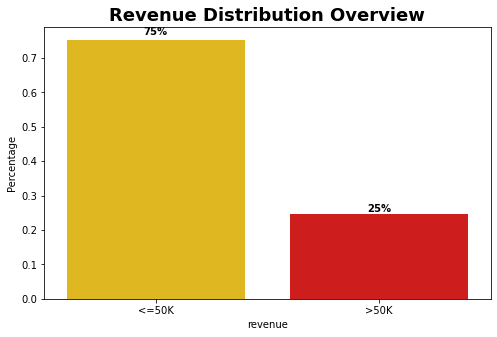

In [9]:
plt.figure(figsize = (8,5))
plt.title('Revenue Distribution Overview', fontsize=18, fontweight='bold')
eda_percentage = income['revenue'].value_counts(normalize = True).rename_axis('revenue').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'revenue', y = 'Percentage', data = eda_percentage.head(10), palette='hot_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

Analysing our dependent variable shows that the number of people earning more than 50K as revenue is one third of the people earning less than it.

In [10]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "17-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    if( 71 < x < 80 ):
        return "71-80"
    else:
        return "Greater than 80"

income['age_group'] = income['age'].apply(age_group)

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


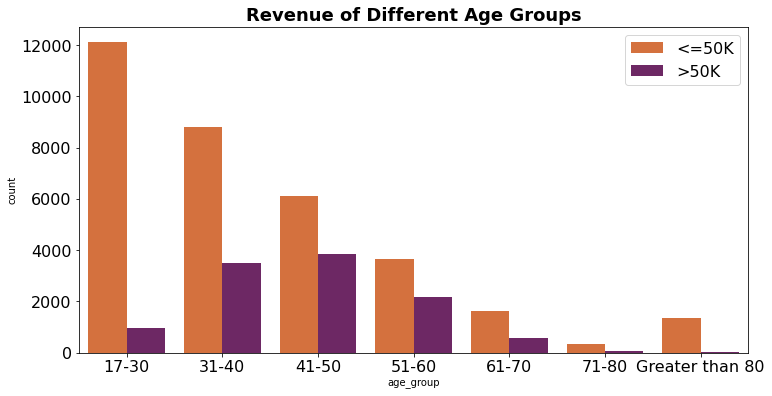

In [11]:
plt.figure(figsize=(12,6))
order_list = ['17-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'Greater than 80']
sns.countplot(income['age_group'], hue = income['revenue'], palette='inferno_r', order = order_list)
plt.title('Revenue of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

As one might imagine, the number of people earning more than 50K is quite negligible amongst people of age group 19-30.

For the people of age group 41-50 and 51-60, the number of people earning more than 50K is quite comparable to those earning less than it!

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


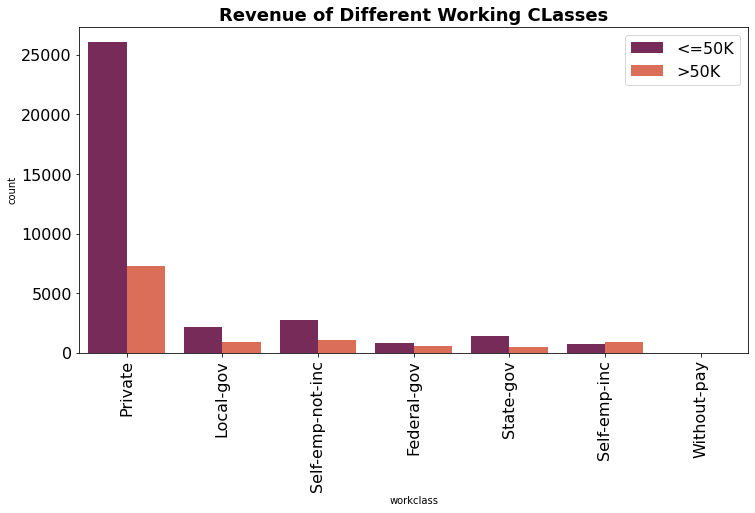

In [12]:
plt.figure(figsize=(12,6))
#order_list = ['17-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'Greater than 80']
sns.countplot(income['workclass'], hue = income['revenue'], palette='rocket')
plt.title('Revenue of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

It is quite interesting to see that Self-Employed is the only category where the number of people who earn more than 50K exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!

People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K!

There is a very minute difference between the number of people whose income is more or less than 50K who work for the Federal Govt.

People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


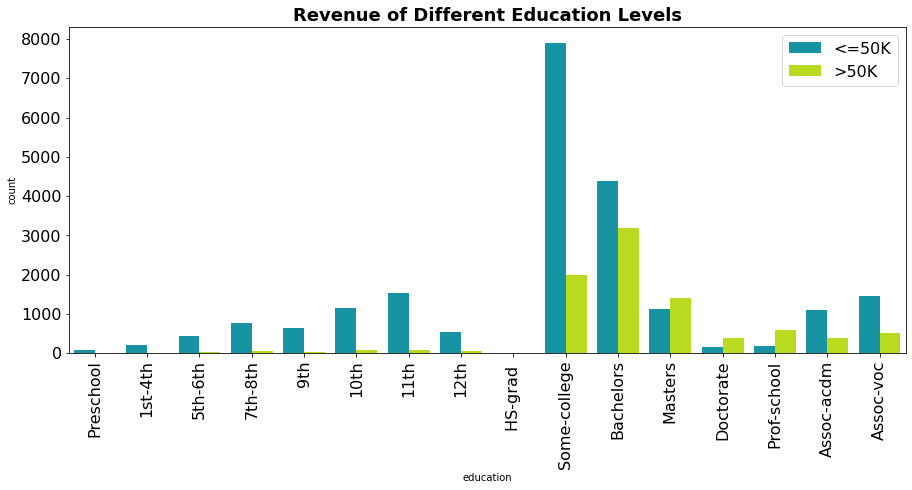

In [13]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(income['education'], hue = income['revenue'], palette='nipy_spectral', order= order_list)
plt.title('Revenue of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

For the people who have completed their education up till 12th Standard, 
there are just a handful of them who earn more than 50K dollars an year. 
Most of the people end up earning below 50K!

For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, 
there are more number of people who are earning greater than 50K than the number of people earning less than it.

In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

In [14]:
plt.figure(figsize=(12,6))
#order_list = ['17-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'Greater than 80']
sns.countplot(income['workclass'], hue = income['revenue'], palette='gist_r')
plt.title('Revenue of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: gist_r is not a valid palette name

<Figure size 864x432 with 0 Axes>

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


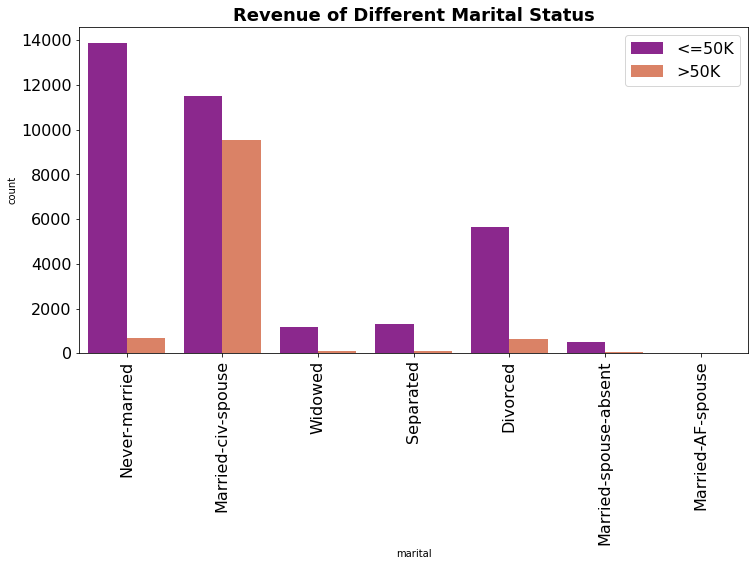

In [15]:
plt.figure(figsize=(12,6))
#order_list = ['17-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'Greater than 80']
sns.countplot(income['marital'], hue = income['revenue'], palette='plasma')
plt.title('Revenue of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
For others, there are less than 25% of the adults earning more than 50K dollars an year.


C:\Users\Visacheck Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


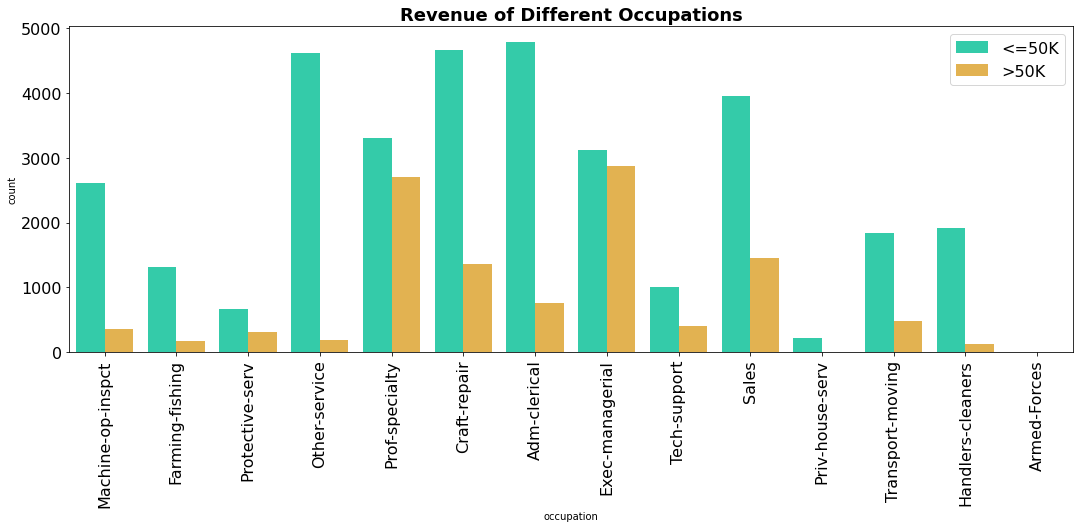

In [16]:
plt.figure(figsize=(18,6))

sns.countplot(income['occupation'], hue = income['revenue'], palette='turbo')
plt.title('Revenue of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Adults in Exec-managerial role are equally likely to earn more than 50K.

There's close to 33% probablity for an adult in prof-specialty to earn more than 50K.

Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K.

Around 25% of the people working in Sales earn more than 50K dollars.

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


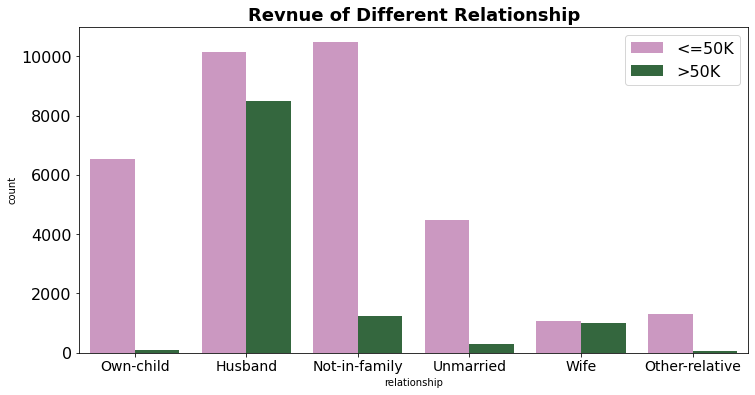

In [17]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(income['relationship'], hue = income['revenue'], palette='cubehelix_r')
plt.title('Revnue of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Wives are equally likely to earn more than 50K.

For Husbands, although significant, there is less possibility of them to earn more than 50K.

There are just a handful of Unmarried people earning more than 50K.

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


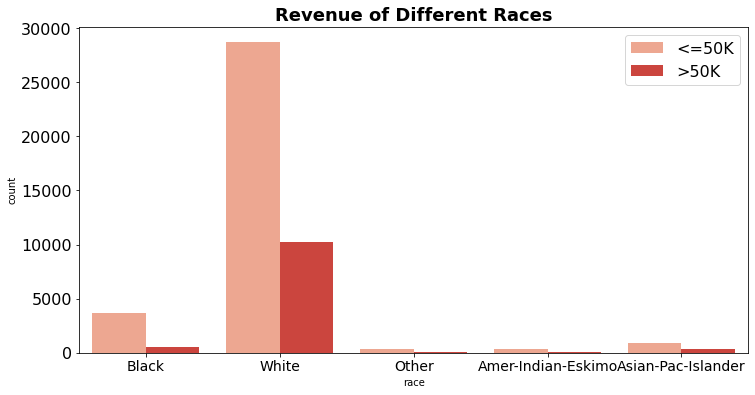

In [18]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(income['race'], hue = income['revenue'], palette='Reds')
plt.title('Revenue of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

An important point to notice over here is that, 
except Whites there are very few people of different races. 

Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


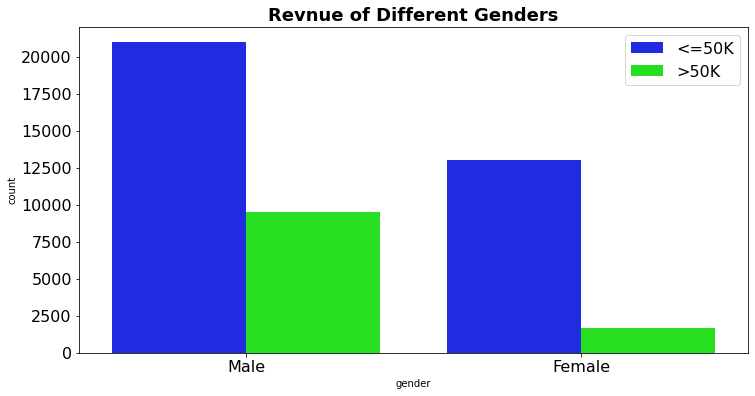

In [19]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(income['gender'], hue = income['revenue'], palette='hsv_r')
plt.title('Revnue of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

For Females, there are less than 10% of the adults earning more than 50K.

In case of Males there are close to 33% of them earning more than 50K.

In [58]:
income['revenue']=income['revenue'].map({'<=50K': 0, '>50K': 1})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


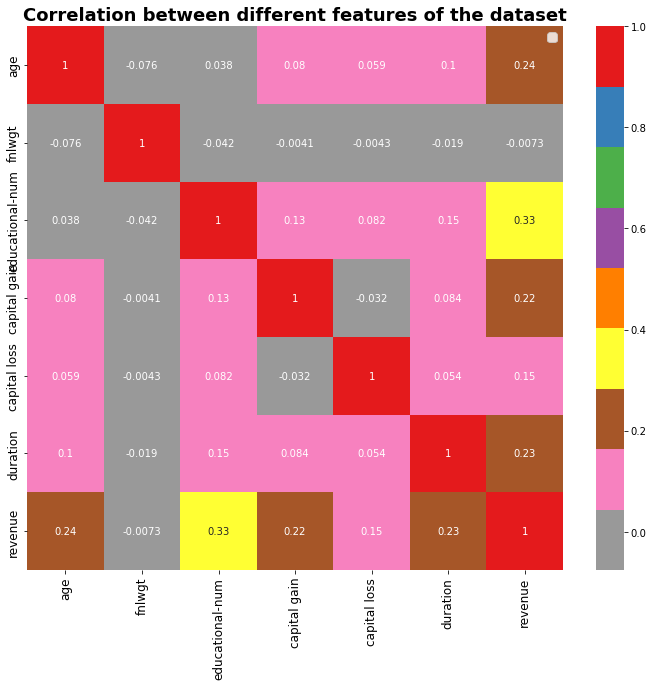

In [60]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(income.corr(), cmap = 'Set1_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

# Data Engineering

Some of the data provided are Categorical data like WorkClass, Education, Marital-Status, Occupation, Relationship, etc. we need to convert these into numerical notations.

we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

Having the income as the dependent variable and the remaining columns as the independent variables

In [66]:
#running a loop of value_counts of each column to find out unique values. 
for c in income.columns:
    print ("---- %s ---" % c)
    print (income[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
87       1
86       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
152234     1
171301     1
257764     1
168312     1
257302     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

some of the data provided are unique like the ‘workclass’ attribute which has only 7 distinct values and some columns have a lot of distinct values 
like fnlgwt attribute which has around 2000+ values.

In [69]:
#dropping based on uniquness of data from the dataset 
income.drop(['educational-num','age', 'duration', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [70]:
income.columns

Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'gender', 'revenue', 'age_group'],
      dtype='object')

# Categorical columns conversion to Numerical values

Now that we have 9 categorical columns, we then convert them to numerical for the ML

In [ ]:
# income['revenue'] = np.where(income['revenue'] == 'female', 0, 1)

In [73]:
#mapping the data into numerical data using map function
# income['revenue'] = income['revenue'].map({'<=50K': 0, '>50K': 1}).astype(int)

income.replace({'revenue':{'<=50K':0, '>50K':1}}, inplace=True)

In [79]:
#gender
income.replace({'gender':{'Male': 0, 'Female': 1}}, inplace=True)

#race
income.replace({'race':{'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 
                'White': 3, 'Amer-Indian-Eskimo': 4}}, inplace=True)

#marital
income.replace({'marital':{'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 
                'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}}, inplace=True)


#workclass
income.replace({'workclass':{'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 
                'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}}, inplace=True)

#education
income.replace({'education':{'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, 
                '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, 
                '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}}, inplace=True)

#occupation
income.replace({'occupation':{'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 
                'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}}, inplace=True)

#relationship
income.replace({'relationship':{'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 
                'Unmarried': 3,'Husband': 4,'Own-child': 5}}, inplace=True)

#age_group
income.replace({'age_group':{'17-30': 0, '31-40': 1, '41-50': 2, '51-60': 3, 
                '61-70': 4, '71-80': 5, 'Greater than 80': 6}}, inplace=True)

In [80]:
income.head()

,workclass,education,marital,occupation,relationship,race,gender,revenue,age_group
0,5,11,5,6,5,0,0,0,0
1,5,3,2,1,4,3,0,0,1
2,4,9,2,14,4,3,0,1,0
3,5,0,2,6,4,0,0,1,2
5,5,13,5,13,0,3,0,0,1


So, here we are finally at our all numerical notations dataset. which can be now fed into any ML predictive modeling algorithm.

# Model section

our goal is to predict the income which can either be 0 or 1 ( less than 50K or greater than 50K) and we want to identify a relation between our output (income) and remaining independent features ( education, workclass, gender, etc. ). This scenario is a classic example of Classification (classify whether income is <50K or more ).

Logistic Regression is a Statistical predicting model that can predict either a ‘Yes’(1) or ‘No’(0). It is based on a Logit or Sigmoid function which ranges between 0 and 1.

In [83]:
# identifying the features

#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation,age_group
#columns concate using np.c_ provided by the numpy library
income_x = pd.DataFrame(np.c_[income['relationship'], income['education'], income['race'], income['age_group'],
income['occupation'],income['gender'],income['marital'],income['workclass']], 
columns = ['relationship','education','race','occupation','gender','marital','workclass','age_group'])
#Y axis = Our dependent variable or the income of adult i.e Income
income_y = pd.DataFrame(income.revenue)

Here we are dividing our data into a dependent feature that is income as income_y and independent features that are relationship, race, occupation, gender, marital, workclass, age_group as income_x.

In [84]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 70% training and 40% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(income_x, income_y, test_size=0.40, random_state=42)

In [85]:
#Train our model with the training data
reg.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = reg.predict(x_test)

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
#feeding the predict function with our test values in the format 
[['relationship','education','race','occupation','gender','marital','workclass','age_group']]
reg.predict([[2,5,4,7,1,1,1,3]])

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [90]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7605727237547681
